In [114]:
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def z_score(df: pd.DataFrame, col_name: str):
    _col = df[col_name]
    _mean = _col.mean()
    _std = _col.std()
    df[col_name] = (_col - _mean) / _std
    return df

In [115]:
data = pd.read_csv('../data/preprocessed/no_dup_13_series.csv')
data

,日期,柜员号,尾箱余额,在/离行,是否开启循环
0,2016-02-01,9012,600,在行,是
1,2016-02-02,9012,504000,在行,是
2,2016-02-03,9012,467300,在行,是
3,2016-02-04,9012,382200,在行,是
4,2016-02-05,9012,298700,在行,是
...,...,...,...,...,...
5195,2017-03-02,9490,163300,在行,是
5196,2017-03-03,9490,215500,在行,是
5197,2017-03-04,9490,241100,在行,是
5198,2017-03-05,9490,266400,在行,是


In [116]:
X1 = {i: z_score(g, '尾箱余额')['尾箱余额'] for i, g in data.groupby('柜员号')}
list(X1.values())[1]

3600   -0.360440
3601   -0.360440
3602   -0.389723
3603   -0.626359
3604   -0.196615
          ...   
3995    1.233488
3996    0.881304
3997    0.775253
3998    0.647834
3999    0.332847
Name: 尾箱余额, Length: 400, dtype: float64

In [117]:
k_list = range(2, 13)
inertia_list = []
sil_list = []
for k in k_list:
    model = KMeans(n_clusters=k)
    _X = np.array(list(X1.values()))
    new_X = fft(_X).real
    model.fit(new_X)
    inertia_list.append(model.inertia_)
    sil_list.append(silhouette_score(new_X, model.labels_))

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

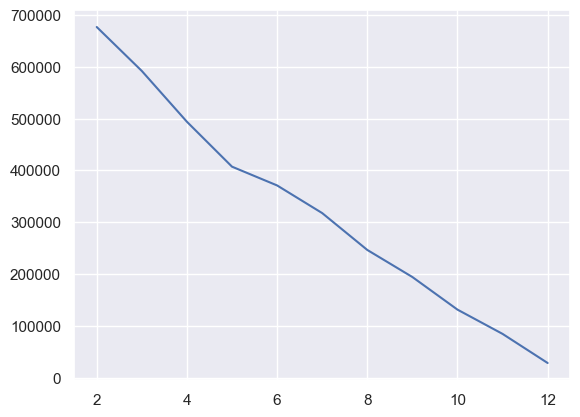

In [118]:
plt.plot(k_list, inertia_list)

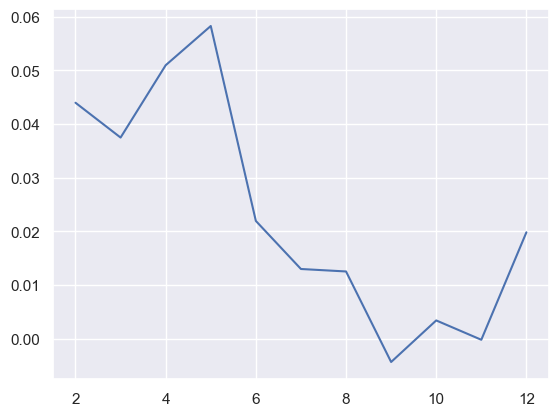

In [119]:
plt.plot(k_list, sil_list)

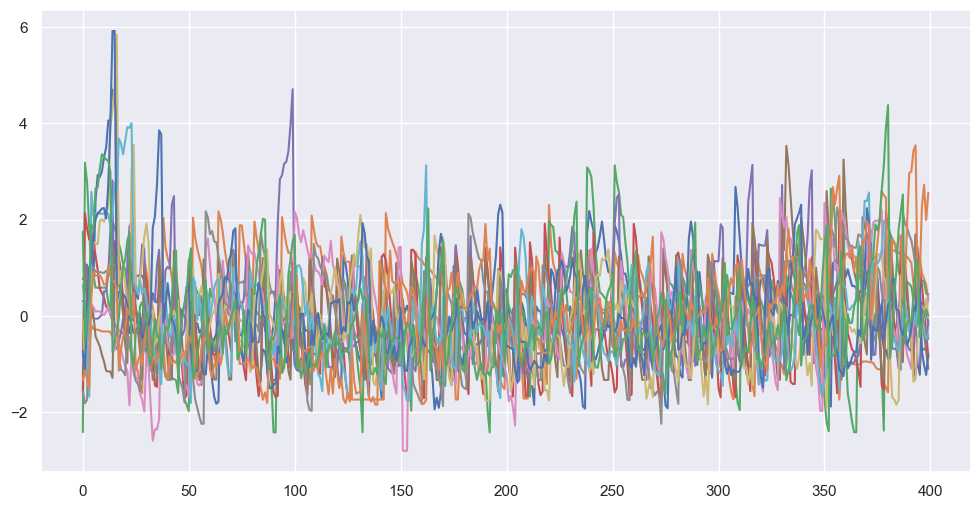

In [120]:
plt.figure(figsize=(12, 6))
for s in list(X1.values())[:]:
    pd.Series(s).reset_index(drop=True).plot()

<Axes: >

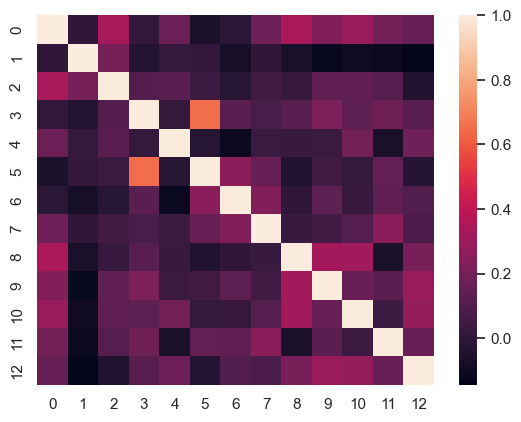

In [121]:
sns.heatmap(pd.DataFrame(np.array(list(X1.values())).T).corr())

In [122]:
sil_list2 = []
for k in k_list:
    model2 = AgglomerativeClustering(n_clusters=k)
    _X = np.array(list(X1.values()))
    new_X = fft(_X).real
    model2.fit(new_X)
    sil_list2.append(silhouette_score(new_X, model2.labels_))

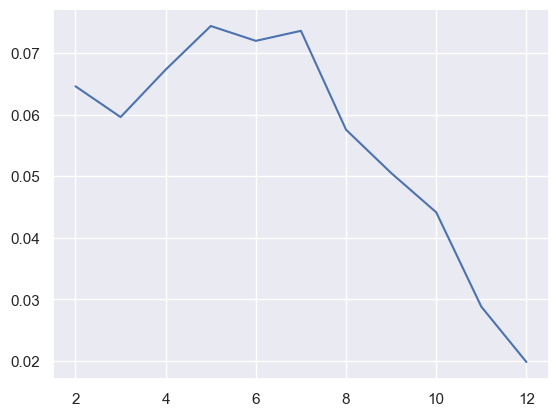

In [123]:
plt.plot(k_list, sil_list2)

In [129]:
model = KMeans(n_clusters=5)
model.fit(_X)

model2 = AgglomerativeClustering(n_clusters=5)
model2.fit(_X)

C:\Users\LiuShu\miniconda3\envs\main\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AgglomerativeClustering(n_clusters=5)

In [130]:
pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values()

9003    0
9164    0
9200    0
9207    0
9490    0
9025    1
9049    1
9053    1
9077    1
9472    1
9012    2
9039    3
9008    4
Name: kmeans cluster, dtype: int32

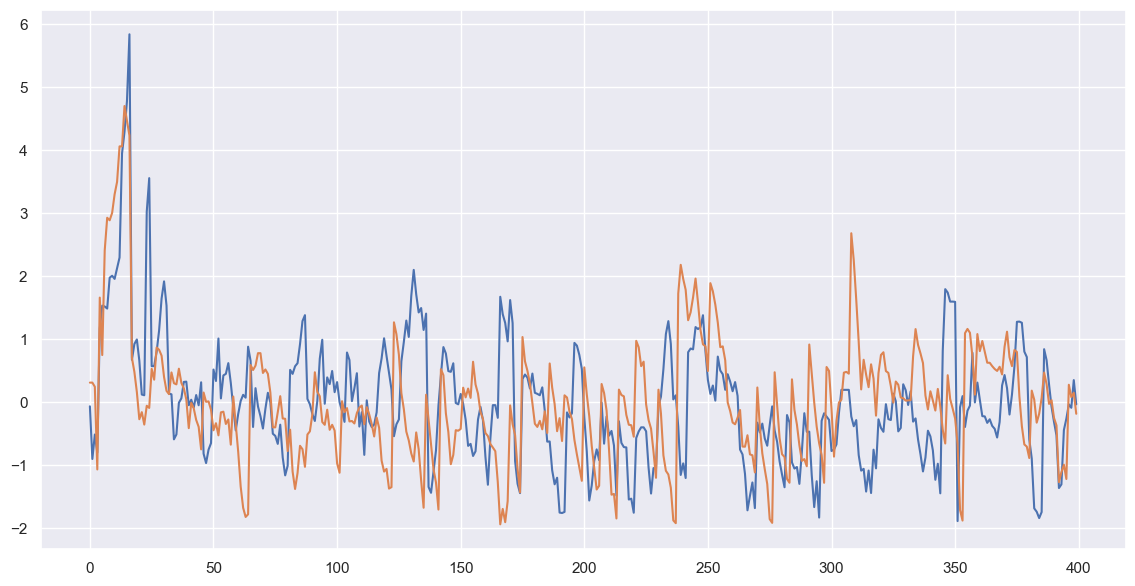

In [131]:
plt.figure(figsize=(14, 7))
for i in [9164, 9003]:
    pd.Series(X1[i]).reset_index(drop=True).plot()

In [132]:
pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values()

9003    0
9164    0
9200    0
9207    0
9490    0
9053    1
9077    1
9472    1
9008    2
9012    2
9025    3
9049    3
9039    4
Name: agg cluster, dtype: int64

In [133]:
pd.concat([
    pd.Series(model.labels_, index=X1.keys()).rename('kmeans cluster').sort_values(),
    pd.Series(model2.labels_, index=X1.keys()).rename('agg cluster').sort_values(),
], axis=1)

,kmeans cluster,agg cluster
9003,0,0
9164,0,0
9200,0,0
9207,0,0
9490,0,0
9025,1,3
9049,1,3
9053,1,1
9077,1,1
9472,1,1
